<a href="https://colab.research.google.com/github/therahulbhagat19/MLProjects/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [ ]:
data = pd.read_csv('/content/gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
data.shape


(2290, 6)

Features Matrix

In [ ]:
x = data.drop(['Date','GLD'], axis =1)
y = data['GLD']

In [ ]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

SVR Model Training

In [ ]:
from sklearn.svm import SVR
regressor1 = SVR()
regressor1.fit(x_train,y_train)

SVR()

KNN Model Training

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor2 = KNeighborsRegressor(n_neighbors = 8)
regressor2.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

R2 Scores of the two models

In [ ]:
from sklearn import metrics
score1 = metrics.r2_score(y_test,regressor1.predict(x_test))
score2 = metrics.r2_score(y_test,regressor2.predict(x_test))
print(score1)
print(score2)

0.11167650403674612
0.9247085060724536


Plots of result and actual data

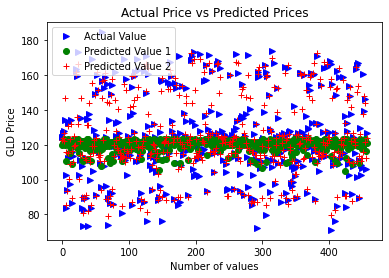

In [ ]:
y_test = list(y_test)
plt.plot(y_test, 'b>', label = 'Actual Value')
plt.plot(regressor1.predict(x_test), 'go', label='Predicted Value 1')
plt.plot(regressor2.predict(x_test), 'r+', label='Predicted Value 2')
plt.title('Actual Price vs Predicted Prices')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()              

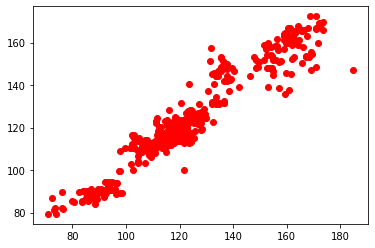

In [ ]:
plt.plot(y_test,regressor2.predict(x_test),'ro')

Statistics of Data(Features)

In [ ]:
data.describe()



,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


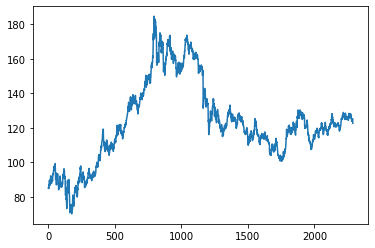

In [ ]:
plt.plot(data['GLD'])

In [ ]:
correlation = data.corr()

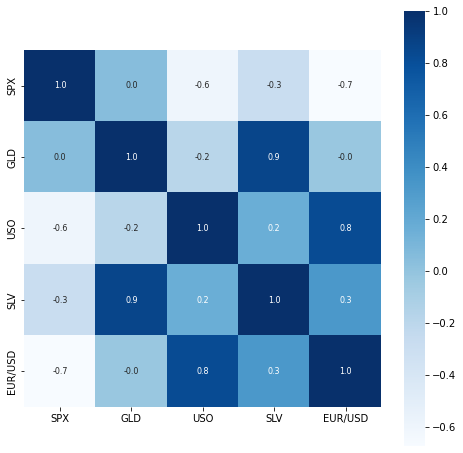

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
poly_features = poly.fit_transform(x_train)
from sklearn.linear_model import LinearRegression
regressor3 = LinearRegression()
regressor3.fit(poly_features,y_train)

LinearRegression()

In [ ]:
print(poly_features)

[[1.00000000e+00 1.46026001e+03 3.45099980e+01 ... 1.46291669e+03
  5.65193344e+01 2.18360702e+00]
 [1.00000000e+00 1.44715002e+03 3.41500020e+01 ... 1.45611604e+03
  5.59950733e+01 2.15329559e+00]
 [1.00000000e+00 2.08913989e+03 1.33200000e+01 ... 1.94238438e+02
  1.53004536e+01 1.20523972e+00]
 ...
 [1.00000000e+00 2.46554004e+03 1.00400000e+01 ... 3.39460677e+02
  2.40012367e+01 1.69698408e+00]
 [1.00000000e+00 1.12619995e+03 3.88400000e+01 ... 4.05301395e+02
  3.45822411e+01 2.95072116e+00]
 [1.00000000e+00 1.25418994e+03 3.53800010e+01 ... 1.32673908e+03
  5.98358018e+01 2.69858876e+00]]


In [ ]:
result3 = regressor3.predict(poly.fit_transform(x_test))

Poly Regression Results

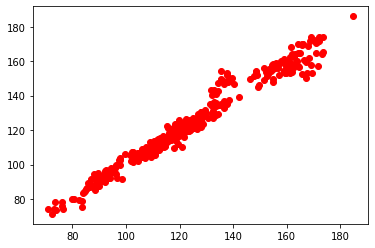

In [ ]:
plt.plot(y_test,result3,'ro')

In [ ]:
score3 = metrics.r2_score(y_test,result3)

In [ ]:
print(score3)

0.9687058542172139


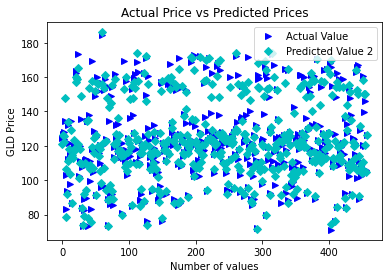

In [ ]:
y_test = list(y_test)
plt.plot(y_test, 'b>', label = 'Actual Value')
#plt.plot(regressor1.predict(x_test), 'go', label='Predicted Value 1')
#plt.plot(regressor2.predict(x_test), 'r+', label='Predicted Value 2')
plt.plot(result3, 'cD', label='Predicted Value 2')
plt.title('Actual Price vs Predicted Prices')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()  